<a href="https://colab.research.google.com/github/eunhoyou/ocr_craft_deep-text-recognition-benchmark/blob/main/ocr_craft_deep_text_recognition_benchmark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import module

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
from os.path import exists, join, basename, splitext
!pip3 install lmdb
!pip3 install torchvision==0.13
import torchvision
import torch
import lmdb
import sys
project_name = '/content/drive/MyDrive/ColabNotebooks/CRAFT-pytorch'
sys.path.append(project_name)
import time
import matplotlib
import matplotlib.pylab as plt
plt.rcParams["axes.grid"] = False

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Text Detection Model : CRAFT (VGGNet-16)

## Detect text

(-0.5, 1279.5, 852.5, -0.5)

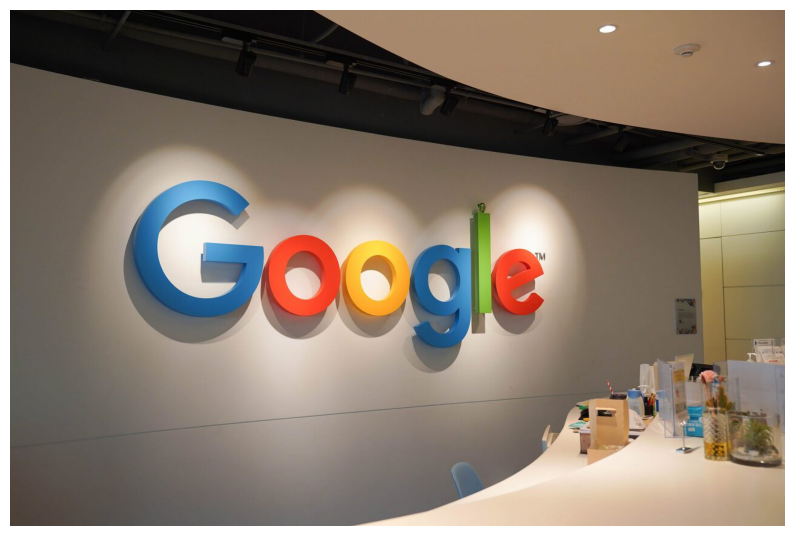

In [ ]:
# IMAGE_URL = '/content/drive/MyDrive/images/0.png'
# IMAGE_URL = '/content/drive/MyDrive/images/sign.jpg'
IMAGE_URL = '/content/drive/MyDrive/images/eng_ocr.jpeg'

image_file_name = basename(IMAGE_URL)
download_dir = '/content/images'
!mkdir -p {download_dir} && rm -rf {download_dir}/*
!cp -r {IMAGE_URL} {download_dir}

plt.figure(figsize=(10, 10))
plt.imshow(matplotlib.image.imread(join(download_dir, image_file_name)))
plt.axis('off')

In [ ]:
project_name = '/content/drive/MyDrive/ColabNotebooks/CRAFT-pytorch'
pretrained_model = '/content/drive/MyDrive/ColabNotebooks/Model/craft_mlt_25k.pth'
!cd {project_name} && python test.py --trained_model={pretrained_model} --test_folder=/content/images

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:252: UserWarning: Accessing the model URLs via the internal dictionary of the module is deprecated since 0.13 and will be removed in 0.15. Please access them via the appropriate Weights Enum instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
Loading weights from checkpoint (/content/drive/MyDrive/ColabNotebooks/Model/craft_mlt_25k.pth)
elapsed time : 0.40786027908325195s


(-0.5, 1279.5, 431.5, -0.5)

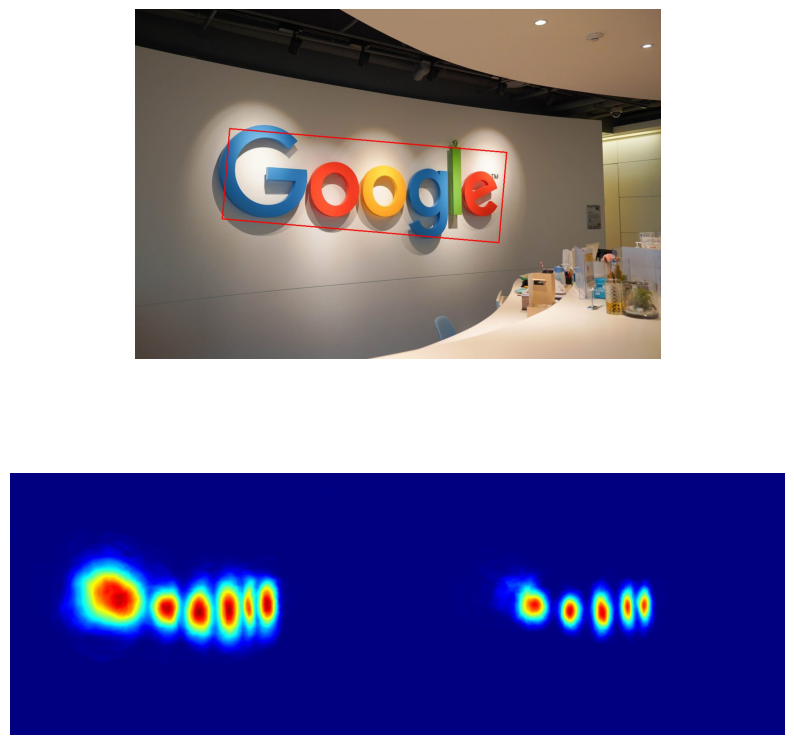

In [ ]:
result_img = join(project_name, 'result','res_'+image_file_name).split('.')[0] + '.jpg'
result_mask = join(project_name, 'result','res_'+image_file_name).split('.')[0] + '_mask.jpg'

plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.imshow(matplotlib.image.imread(result_img))
plt.axis('off')
plt.subplot(2, 1, 2)
plt.imshow(matplotlib.image.imread(result_mask))
plt.axis('off')

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:252: UserWarning: Accessing the model URLs via the internal dictionary of the module is deprecated since 0.13 and will be removed in 0.15. Please access them via the appropriate Weights Enum instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
Loading weights from checkpoint (/content/drive/MyDrive/ColabNotebooks/deep-text-recognition-benchmark/saved_models/TPS-EfficientNet-BiLSTM-Attn-sensitive/best_accuracy.pth)
Traceback (most recent call last):
  File

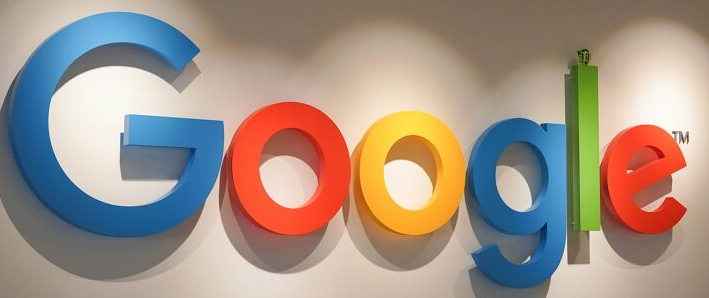

In [ ]:
project_name = '/content/drive/MyDrive/ColabNotebooks/CRAFT-pytorch'
!cd '/content/drive/MyDrive/ColabNotebooks/CRAFT-pytorch' && python test.py --trained_model={pretrained_model} --test_folder=/content/images

import cv2
from google.colab.patches import cv2_imshow
import shutil

result_dir = f'{project_name}/result/'
file_name = 'res_' + image_file_name.split('.')[0]
img_path = IMAGE_URL
txt_path = f'{result_dir}{file_name}.txt'
shutil.rmtree(f'{project_name}/result_img/')
os.mkdir(f'{project_name}/result_img/')

img = cv2.imread(img_path)
for idx, line in enumerate(open(txt_path)):
  temp = line.split(',')
  y = int(temp[1])
  h = int(temp[5]) - y
  x = int(temp[0])
  w = int(temp[2]) - x
  cropped_img = img[y:y+h, x:x+w]
  print(f'{file_name}_{idx}.jpg')
  cv2_imshow(cropped_img)
  cv2.imwrite(f'{project_name}/result_img/{file_name}_{idx}.jpg', cropped_img)
  print()

# Text Recognition Model : deep-text-recognition-benchmark

## Load Model

In [ ]:
project_name = '/content/drive/MyDrive/ColabNotebooks/deep-text-recognition-benchmark'
result_folder = '/content/drive/MyDrive/ColabNotebooks/CRAFT-pytorch/result_img/'
# pretrained_model = '/content/drive/MyDrive/ColabNotebooks/Model/TPS-ResNet-BiLSTM-Attn-case-sensitive.pth'
pretrained_model = f'{project_name}/saved_models/TPS-ResNet-BiLSTM-Attn-sensitive/best_accuracy.pth'

!cd {project_name} && CUDA_VISIBLE_DEVICES=0 python demo.py \
        --Transformation TPS --FeatureExtraction ResNet --SequenceModeling BiLSTM --Prediction Attn --sensitive \
        --image_folder {result_folder} \
        --saved_model {pretrained_model}

,img,id,label,confidence score
0,,res_eng_textinthewild3_0.jpg,Google,0.9462

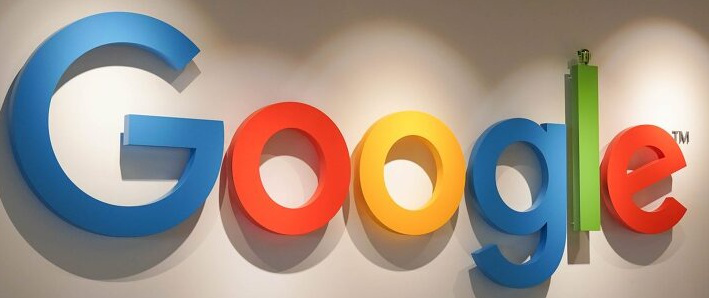

In [ ]:
from IPython.core.display import display, HTML
from PIL import Image
import base64
import io
import pandas as pd

project_name = '/content/drive/MyDrive/ColabNotebooks/deep-text-recognition-benchmark'
result_folder = '/content/drive/MyDrive/ColabNotebooks/CRAFT-pytorch/result_img/'
pretrained_model = f'{project_name}/saved_models/TPS-ResNet-BiLSTM-Attn-sensitive/best_accuracy.pth'

output = !cd {project_name} && CUDA_VISIBLE_DEVICES=0 python demo.py \
        --Transformation TPS --FeatureExtraction ResNet --SequenceModeling BiLSTM --Prediction Attn --sensitive \
        --image_folder {result_folder} \
        --saved_model {pretrained_model}

sum_conf = 0
data = pd.DataFrame()
for ind, row in enumerate(output[output.index('image_path               \tpredicted_labels         \tconfidence score')+2:]):
  row = row.split('\t')
  filename = row[0].strip()
  id = row[0].strip().split('/')[-1]
  label = row[1].strip()
  conf = row[2].strip()
  img = Image.open(filename)
  img_buffer = io.BytesIO()
  img.save(img_buffer, format="PNG")
  imgStr = base64.b64encode(img_buffer.getvalue()).decode("utf-8")

  data.loc[ind, 'img'] = '<img src="data:image/png;base64,{0:s}">'.format(imgStr)
  data.loc[ind, 'id'] = id
  data.loc[ind, 'label'] = label
  data.loc[ind, 'confidence score'] = conf

html_all = data.to_html(escape=False)
display(HTML(html_all))

,img,id,label,confidence score
0,,res_eng_textinthewild3_0.jpg,Goodle,0.2319

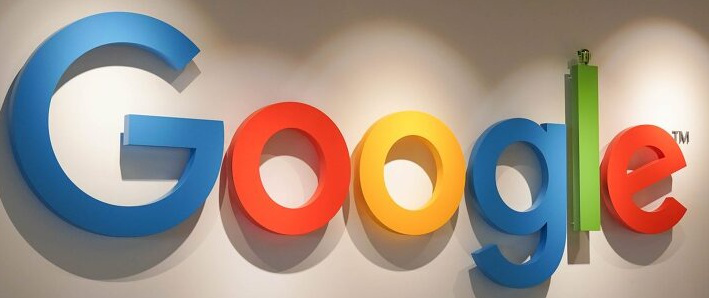

In [ ]:
project_name = '/content/drive/MyDrive/ColabNotebooks/deep-text-recognition-benchmark'
result_folder = '/content/drive/MyDrive/ColabNotebooks/CRAFT-pytorch/result_img/'
pretrained_model = f'{project_name}/saved_models/TPS-EfficientNet-BiLSTM-Attn-sensitive/best_accuracy.pth'

output = !cd {project_name} && CUDA_VISIBLE_DEVICES=0 python demo.py \
        --Transformation TPS --FeatureExtraction EfficientNet --SequenceModeling BiLSTM --Prediction Attn --sensitive \
        --image_folder {result_folder} \
        --saved_model {pretrained_model}

sum_conf = 0
data = pd.DataFrame()
for ind, row in enumerate(output[output.index('image_path               \tpredicted_labels         \tconfidence score')+2:]):
  row = row.split('\t')
  filename = row[0].strip()
  id = row[0].strip().split('/')[-1]
  label = row[1].strip()
  conf = row[2].strip()

  img = Image.open(filename)
  img_buffer = io.BytesIO()
  img.save(img_buffer, format="PNG")
  imgStr = base64.b64encode(img_buffer.getvalue()).decode("utf-8")

  data.loc[ind, 'img'] = '<img src="data:image/png;base64,{0:s}">'.format(imgStr)
  data.loc[ind, 'id'] = id
  data.loc[ind, 'label'] = label
  data.loc[ind, 'confidence score'] = conf

html_all = data.to_html(escape=False)
display(HTML(html_all))

## Data preprocessing


In [ ]:
# import json
# import random
# import os
# from tqdm import tqdm
# import cv2

# # htr / ocr / textinthewild
# data_type = 'textinthewild'

# # handwriting_data_info.json / printed_data_info.json / textinthewild_data_info.json
# labeling_filename = 'textinthewild_data_info.json'

# file = json.load(open(f'./kor_dataset/aihub_data/{data_type}/{labeling_filename}'))

# image_files = os.listdir(f'./kor_dataset/aihub_data/{data_type}/images/')
# total = len(image_files)
# print("total :", total)
# random.shuffle(image_files)

# n_train = int(len(image_files) * 0.7)
# n_validation = int(len(image_files) * 0.15)
# n_test = int(len(image_files) * 0.15)

# train_files = image_files[:n_train]
# validation_files = image_files[n_train:n_train+n_validation]
# test_files = image_files[-n_test:]

# ## Separate image id - train / validation / test
# train_img_ids = {}
# validation_img_ids = {}
# test_img_ids = {}

# for image in tqdm(file['images']): # {filename}: {image id}
#   if image['file_name'] in train_files:
#       train_img_ids[image['file_name']] = image['id']
#   elif image['file_name'] in validation_files:
#       validation_img_ids[image['file_name']] = image['id']
#   elif image['file_name'] in test_files:
#       test_img_ids[image['file_name']] = image['id']

# ## Annotations - train / validation / test
# train_annotations = {f:[] for f in train_img_ids.keys()} # {image id}: []
# validation_annotations = {f:[] for f in validation_img_ids.keys()}
# test_annotations = {f:[] for f in test_img_ids.keys()}

# train_ids_img = {train_img_ids[id_]:id_ for id_ in train_img_ids}
# validation_ids_img = {validation_img_ids[id_]:id_ for id_ in validation_img_ids}
# test_ids_img = {test_img_ids[id_]:id_ for id_ in test_img_ids}

# for idx, annotation in tqdm(enumerate(file['annotations'])):
#   if annotation['attributes']['class'] != 'word':
#       continue
#   if annotation['image_id'] in train_ids_img:
#       train_annotations[train_ids_img[annotation['image_id']]].append(annotation)
#   elif annotation['image_id'] in validation_ids_img:
#       validation_annotations[validation_ids_img[annotation['image_id']]].append(annotation)
#   elif annotation['image_id'] in test_ids_img:
#       test_annotations[test_ids_img[annotation['image_id']]].append(annotation)

# ## Write json files
# with open(f'{data_type}_train_annotation.json', 'w') as file:
#   json.dump(train_annotations, file)
# with open(f'{data_type}_validation_annotation.json', 'w') as file:
#   json.dump(validation_annotations, file)
# with open(f'{data_type}_test_annotation.json', 'w') as file:
#   json.dump(test_annotations, file)

# ## Make gt_{obj}.txt files
# data_root_path = f'./kor_dataset/aihub_data/{data_type}/images/'
# save_root_path = f'./deep-text-recognition-benchmark/{data_type}_data/'

# ## Get images to save_root_path
# obj_list = ['test', 'train', 'validation']
# for obj in obj_list:
#   total_annotations = json.load(open(f'./{data_type}_{obj}_annotation.json'))
#   gt_file = open(f'{save_root_path}gt_{obj}.txt', 'w')
#   for file_name in tqdm(total_annotations):
#     # textinthewild
#     if (data_type == 'textinthewild'):
#       annotations = total_annotations[file_name]
#       image = cv2.imread(f'{data_root_path}{file_name}')
#       for idx, annotation in enumerate(annotations):
#         x, y, w, h = annotation['bbox']
#         if x <= 0 or y <= 0 or w <= 0 or h <= 0:
#             continue
#         text = annotation['text']
#         crop_img = image[y:y+h, x:x+w]
#         crop_file_name = file_name[:-4]+'_{:03}.jpg'.format(idx+1)
#         cv2.imwrite(save_root_path+obj+'/'+crop_file_name, crop_img)
#         gt_file.write(f'{obj}/{crop_file_name}\t{text}\n')
#     # htr / ocr
#     else:
#       annotations = total_annotations[file_name]
#       for idx, annotation in enumerate(annotations):
#         text = annotation['text']
#         gt_file.write(f'{obj}/{file_name}\t{text}\n')

In [ ]:
## create_lmdb_dataset

# !python3 ./deep-text-recognition-benchmark/create_lmdb_dataset.py \
#     --inputPath ./deep-text-recognition-benchmark/htr_data/ \
#     --gtFile ./deep-text-recognition-benchmark/htr_data/gt_train.txt \
#     --outputPath ./deep-text-recognition-benchmark/htr_data_lmdb/train

# 아래 코드들은 절대로 실행하지 말아 주세요!!!

## Training

In [ ]:
project_name = '/content/drive/MyDrive/ColabNotebooks/deep-text-recognition-benchmark'

list_train_data = []
list_train_data.append(f'{project_name}/eng_train/MJ_train')
list_train_data.append(f'{project_name}/eng_train/ST_train')
list_train_data.append(f'{project_name}/kor_train/train_htr')
list_train_data.append(f'{project_name}/kor_train/train_ocr')
list_train_data.append(f'{project_name}/kor_train/train_textinthewild')

list_valid_data = []
list_valid_data.append(f'{project_name}/eng_valid')
list_valid_data.append(f'{project_name}/eng_valid')
list_valid_data.append(f'{project_name}/kor_valid/validation_htr')
list_valid_data.append(f'{project_name}/kor_valid/validation_ocr')
list_valid_data.append(f'{project_name}/kor_valid/validation_textinthewild')

### TPS-ResNet-BiLSTM-Attn

In [ ]:
# saved_model_path = f'{project_name}/saved_models/TPS-ResNet-BiLSTM-Attn-Seed0/best_accuracy.pth'

project_name = '/content/drive/MyDrive/ColabNotebooks/deep-text-recognition-benchmark'
train_data_path = '/content/drive/MyDrive/ColabNotebooks/data_lmdb_release/training'
valid_data_path = '/content/drive/MyDrive/ColabNotebooks/data_lmdb_release/validation'

!cd {project_name} && CUDA_VISIBLE_DEVICES=0 python3 train.py \
      --Transformation TPS --FeatureExtraction ResNet --SequenceModeling BiLSTM --Prediction Attn --sensitive \
      --train_data {train_data_path} --valid_data {valid_data_path} \
      --select_data MJ-ST --batch_ratio 0.5-0.5 --total_data_usage_ratio 0.7 \
      --num_iter 100000 --valInterval 1000

Filtering the images containing characters which are not in opt.character
Filtering the images whose label is longer than opt.batch_max_length
--------------------------------------------------------------------------------
dataset_root: /content/drive/MyDrive/ColabNotebooks/data_lmdb_release/training
opt.select_data: ['MJ', 'ST']
opt.batch_ratio: ['0.5', '0.5']
--------------------------------------------------------------------------------
dataset_root:    /content/drive/MyDrive/ColabNotebooks/data_lmdb_release/training	 dataset: MJ
sub-directory:	/MJ/MJ_test	 num samples: 891924
sub-directory:	/MJ/MJ_train	 num samples: 7224586
sub-directory:	/MJ/MJ_valid	 num samples: 802731
num total samples of MJ: 8919241 x 0.7 (total_data_usage_ratio) = 6243468
num samples of MJ per batch: 192 x 0.5 (batch_ratio) = 96
--------------------------------------------------------------------------------
dataset_root:    /content/drive/MyDrive/ColabNotebooks/data_lmdb_release/training	 dataset: ST
sub-

### TPS-EfficientNet-BiLSTM-Attn

In [ ]:
# saved_model_path = f'{project_name}/saved_models/TPS-EfficientNet-BiLSTM-Attn-Seed{i-1}/best_accuracy.pth'

project_name = '/content/drive/MyDrive/ColabNotebooks/deep-text-recognition-benchmark'
train_data_path = '/content/drive/MyDrive/ColabNotebooks/data_lmdb_release/training'
valid_data_path = '/content/drive/MyDrive/ColabNotebooks/data_lmdb_release/validation'

!cd {project_name} && CUDA_VISIBLE_DEVICES=0 python3 train.py \
      --Transformation TPS --FeatureExtraction EfficientNet --SequenceModeling BiLSTM --Prediction Attn --sensitive \
      --train_data {train_data_path} --valid_data {valid_data_path} \
      --select_data MJ-ST --batch_ratio 0.5-0.5 --total_data_usage_ratio 0.7 \
      --num_iter 100000 --valInterval 1000

Filtering the images containing characters which are not in opt.character
Filtering the images whose label is longer than opt.batch_max_length
--------------------------------------------------------------------------------
dataset_root: /content/drive/MyDrive/ColabNotebooks/data_lmdb_release/training
opt.select_data: ['MJ', 'ST']
opt.batch_ratio: ['0.5', '0.5']
--------------------------------------------------------------------------------
dataset_root:    /content/drive/MyDrive/ColabNotebooks/data_lmdb_release/training	 dataset: MJ
sub-directory:	/MJ/MJ_test	 num samples: 891924
sub-directory:	/MJ/MJ_train	 num samples: 7224586
sub-directory:	/MJ/MJ_valid	 num samples: 802731
num total samples of MJ: 8919241 x 0.7 (total_data_usage_ratio) = 6243468
num samples of MJ per batch: 192 x 0.5 (batch_ratio) = 96
--------------------------------------------------------------------------------
dataset_root:    /content/drive/MyDrive/ColabNotebooks/data_lmdb_release/training	 dataset: ST
sub-

### Toy Model

In [ ]:
# !cd {project_name} && CUDA_VISIBLE_DEVICES=0 python3 train.py \
#       --Transformation TPS --FeatureExtraction EfficientNet --SequenceModeling BiLSTM --Prediction Attn \
#       --train_data {train_data_path} \
#       --valid_data {valid_data_path} \
#       --num_iter 1 --valInterval 1000

project_name = '/content/drive/MyDrive/ColabNotebooks/deep-text-recognition-benchmark'
pretrained_model = f'{project_name}/saved_models/TPS-EfficientNet-BiLSTM-Attn-Seed1111/best_accuracy.pth'
image_folder = f'{project_name}/demo_image'

!cd {project_name} && CUDA_VISIBLE_DEVICES=0 python demo.py \
        --Transformation TPS --FeatureExtraction EfficientNet --SequenceModeling BiLSTM --Prediction Attn --sensitive \
        --image_folder {image_folder} \
        --saved_model {pretrained_model}

model input parameters 32 100 20 1 512 256 96 25 TPS EfficientNet BiLSTM Attn
loading pretrained model from /content/drive/MyDrive/ColabNotebooks/deep-text-recognition-benchmark/saved_models/TPS-EfficientNet-BiLSTM-Attn-Seed1111/best_accuracy.pth
--------------------------------------------------------------------------------
image_path               	predicted_labels         	confidence score
--------------------------------------------------------------------------------
/content/drive/MyDrive/ColabNotebooks/deep-text-recognition-benchmark/demo_image/demo_1.png	q}                       	0.0001
/content/drive/MyDrive/ColabNotebooks/deep-text-recognition-benchmark/demo_image/demo_2.jpg	q}                       	0.0001
/content/drive/MyDrive/ColabNotebooks/deep-text-recognition-benchmark/demo_image/demo_3.png	q}                       	0.0001
/content/drive/MyDrive/ColabNotebooks/deep-text-recognition-benchmark/demo_image/demo_4.png	q}                       	0.0001
/content/drive/MyDrive

## Testing


### TPS-ResNet-BiLSTM-Attn

In [ ]:
project_name = '/content/drive/MyDrive/ColabNotebooks/deep-text-recognition-benchmark'
result_folder = '/content/drive/MyDrive/ColabNotebooks/CRAFT-pytorch/result_img/'
saved_model_path = f'{project_name}/saved_models/TPS-ResNet-BiLSTM-Attn-case-sensitive.pth'
eval_data = '/content/drive/MyDrive/ColabNotebooks/data_lmdb_release/evaluation'

!cd {project_name} && CUDA_VISIBLE_DEVICES=0 python3 test.py \
        --Transformation TPS --FeatureExtraction ResNet --SequenceModeling BiLSTM --Prediction Attn --sensitive \
        --eval_data {eval_data} --benchmark_all_eval \
        --saved_model {saved_model_path}

model input parameters 32 100 20 1 512 256 96 25 TPS ResNet BiLSTM Attn
loading pretrained model from /content/drive/MyDrive/ColabNotebooks/deep-text-recognition-benchmark/saved_models/TPS-ResNet-BiLSTM-Attn-case-sensitive.pth
--------------------------------------------------------------------------------
dataset_root:    /content/drive/MyDrive/ColabNotebooks/data_lmdb_release/evaluation/IIIT5k_3000	 dataset: /
sub-directory:	/.	 num samples: 3000
Acc 43.933	 normalized_ED 0.555
--------------------------------------------------------------------------------
dataset_root:    /content/drive/MyDrive/ColabNotebooks/data_lmdb_release/evaluation/SVT	 dataset: /
sub-directory:	/.	 num samples: 647
Acc 51.468	 normalized_ED 0.612
--------------------------------------------------------------------------------
dataset_root:    /content/drive/MyDrive/ColabNotebooks/data_lmdb_release/evaluation/IC03_860	 dataset: /
sub-directory:	/.	 num samples: 860
Acc 23.837	 normalized_ED 0.487
------------

### TPS-EfficientNet-BiLSTM-Attn

In [ ]:
project_name = '/content/drive/MyDrive/ColabNotebooks/deep-text-recognition-benchmark'
result_folder = '/content/drive/MyDrive/ColabNotebooks/CRAFT-pytorch/result_img/'
saved_model_path = f'{project_name}/saved_models/TPS-EfficientNet-BiLSTM-Attn-sensitive/best_accuracy.pth'
eval_data = '/content/drive/MyDrive/ColabNotebooks/data_lmdb_release/evaluation'

!cd {project_name} && CUDA_VISIBLE_DEVICES=0 python3 test.py \
        --Transformation TPS --FeatureExtraction EfficientNet --SequenceModeling BiLSTM --Prediction Attn --sensitive \
        --eval_data {eval_data} --benchmark_all_eval \
        --saved_model {saved_model_path}

model input parameters 32 100 20 1 512 256 96 25 TPS EfficientNet BiLSTM Attn
loading pretrained model from /content/drive/MyDrive/ColabNotebooks/deep-text-recognition-benchmark/saved_models/TPS-EfficientNet-BiLSTM-Attn-sensitive/best_accuracy.pth
--------------------------------------------------------------------------------
dataset_root:    /content/drive/MyDrive/ColabNotebooks/data_lmdb_release/evaluation/IIIT5k_3000	 dataset: /
sub-directory:	/.	 num samples: 3000
Acc 37.133	 normalized_ED 0.507
--------------------------------------------------------------------------------
dataset_root:    /content/drive/MyDrive/ColabNotebooks/data_lmdb_release/evaluation/SVT	 dataset: /
sub-directory:	/.	 num samples: 647
Acc 42.658	 normalized_ED 0.564
--------------------------------------------------------------------------------
dataset_root:    /content/drive/MyDrive/ColabNotebooks/data_lmdb_release/evaluation/IC03_860	 dataset: /
sub-directory:	/.	 num samples: 860
Acc 23.953	 normalized_